# Random Signal Processing

In [6]:
import numpy as np
import pylab as pl
import scipy as sp
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt

## 1 - Random Signal Properties

### 1.1 - Gaussian Noise

In [2]:
sigma = np.sqrt(1.2)
N = 1024

w = sigma*np.random.randn(N)

The eperimental variance is 1.1823490629821387


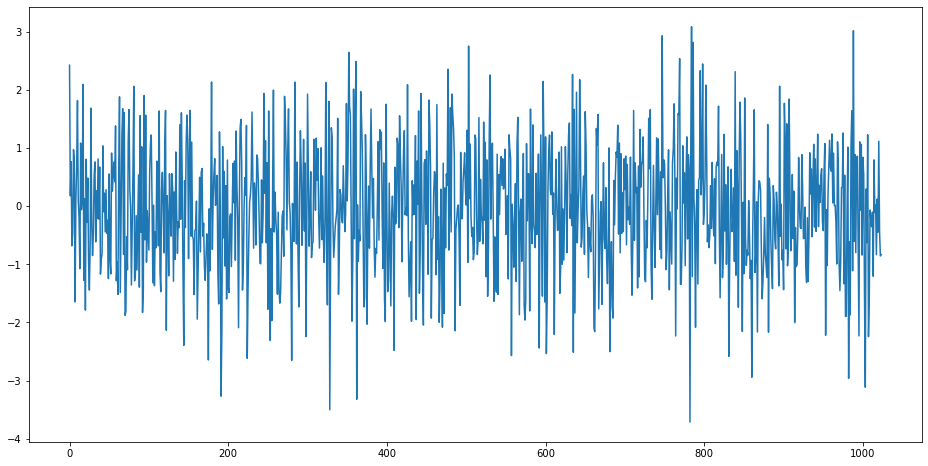

In [15]:
var = np.std(w)
var *= var
print("The eperimental variance is", var)

#t=np.linspace(1.,10.,N,True)

pl.figure(figsize=[16,8])
pl.plot(w)
pl.show()

The experimental and theoretical variance are indeed quite close.

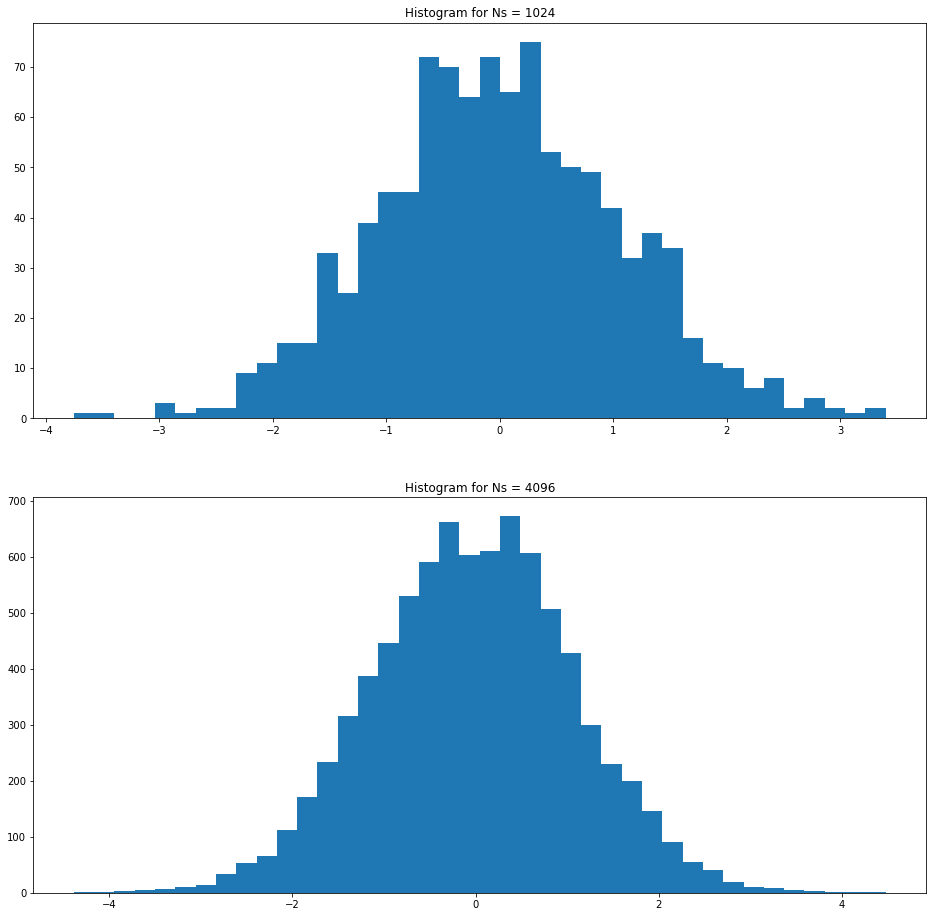

In [9]:
w1 = sigma*np.random.randn(1024)
w2 = sigma*np.random.randn(8192)

pl.figure(figsize=[16,16])
pl.subplot(2,1,1)
pl.title('Histogram for Ns = 1024')
pl.hist(w1, bins=40)
pl.subplot(2,1,2)
pl.title('Histogram for Ns = 4096')
pl.hist(w2, bins=40)
pl.show()

Different realizations with $N_s=1024$ can give different aspects of the histogram, but none of them is really looking like a gaussian function. Increasing $N_s$ reduces variability in the aspect of the histogram and makes it look more like a gaussian : for $N_s=8192Hz$ we can really recognize the function.

The variance empirically measured is 1.1628391737806696


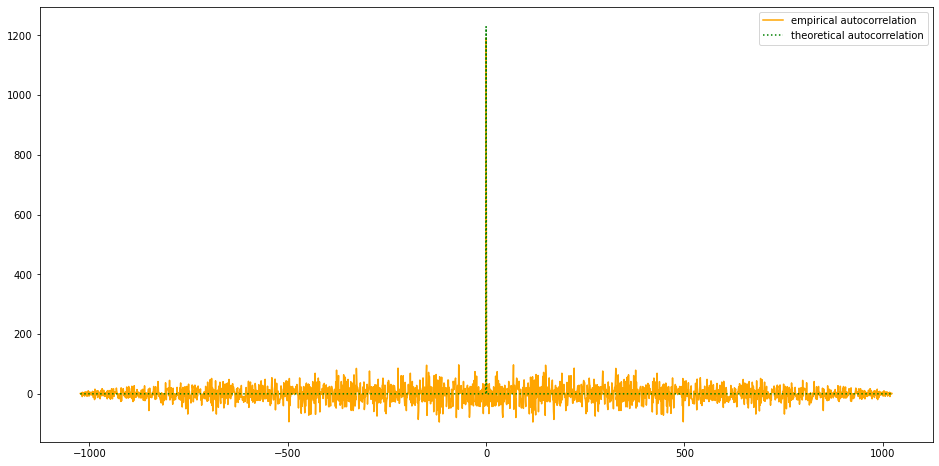

In [29]:
N = 1024
sigma = np.sqrt(1.2)

w = sigma*np.random.randn(N)

eac = np.correlate(w,w,mode='full')
t = np.arange(-N+1,N)

print('The variance empirically measured is',eac[N-1]/N)


tac = np.zeros(len(eac))
tac[1023] = sigma*sigma*N



pl.figure(figsize=[16,8])
pl.plot(t,eac,c='orange',label='empirical autocorrelation')
pl.plot(t,tac,':', c='green', label='theoretical autocorrelation')
pl.legend()
pl.show()

The height of the empirical dirac is indeed close to $\sigma^2N_s$. We can see that the amplitude noise on the empirical autocorrelation graph is gradually decreasing as we go closer to the extremities, this is due to the fact that the mode 'full' of the np.correlate function considers zero-padding, which means that the closer we are to one of the extremities, the more terms in the sum calculating the autocorrelation will be equal to zero, reulting in a smaller amplitude.

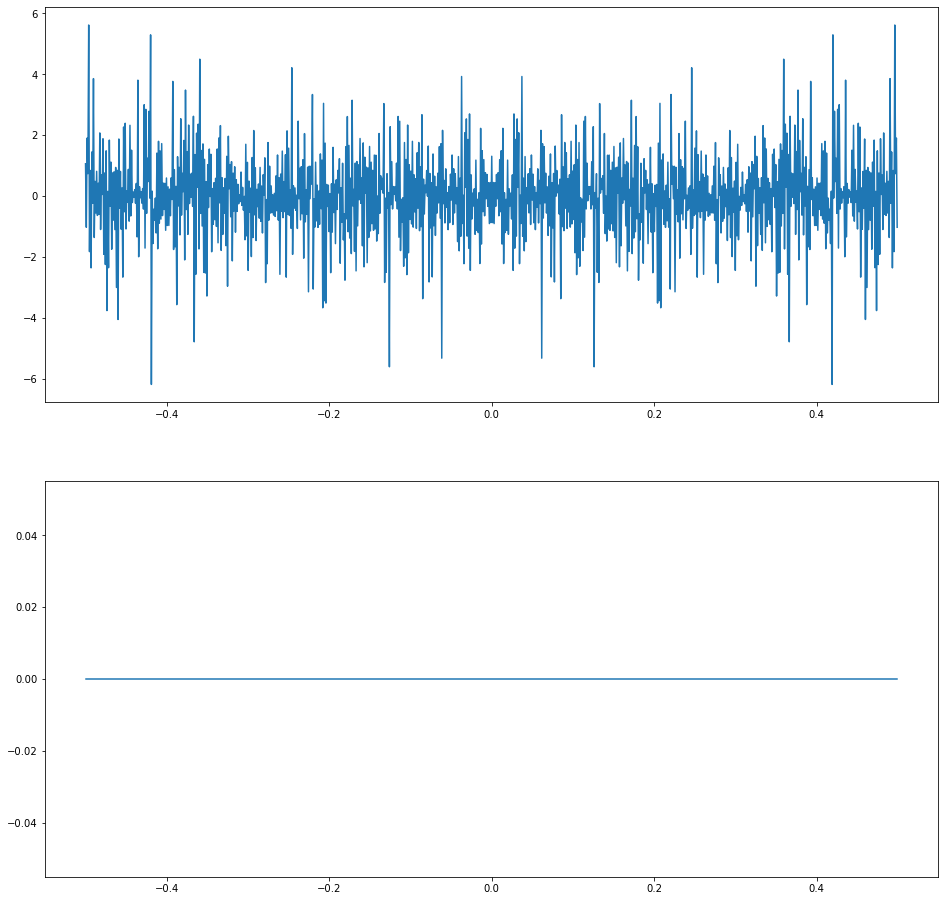

In [38]:
eac = np.correlate(w,w,mode='same')
psd1 = np.fft.fftshift(np.fft.fft(eac))/N
f = np.fft.fftshift(np.fft.fftfreq(N))

pl.figure(figsize=[16,16])
pl.subplot(2,1,1)
pl.plot(f,np.real(psd1))
pl.subplot(2,1,2)
pl.plot(f,np.imag(psd1))
pl.show()

The theoretical PSD of a white noise is constant in $\sigma²$. Here, it looks more like a white noise due to imprecision.

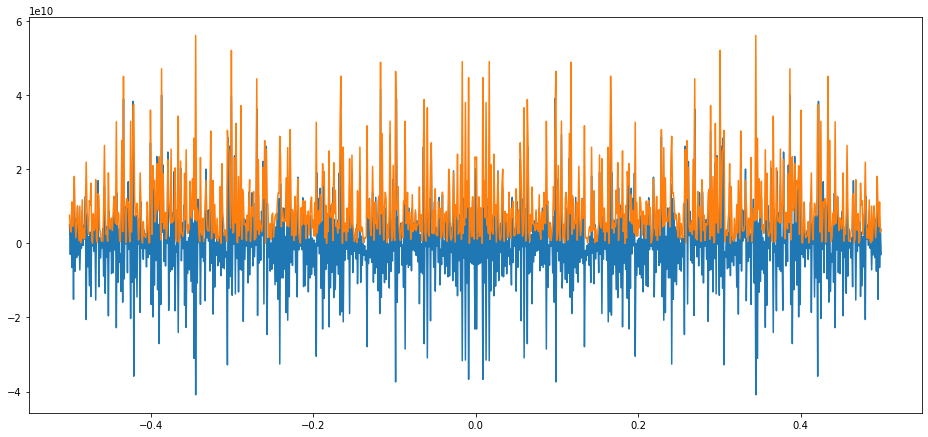

In [152]:
N = 1024
w = sigma*np.random.randn(N)
eac = np.correlate(w,w,mode='same')
psd1 = np.fft.fftshift(np.fft.fft(eac))
psd2 = np.power(np.abs(np.fft.fftshift(np.fft.fft(w))), 2)
f = np.fft.fftshift(np.fft.fftfreq(N))

pl.figure(figsize=[16,16])
pl.subplot(2,1,1)
pl.plot(f,np.real(psd1))
pl.plot(f,np.real(psd2))


The second estimation is positive and looks like the absolute value of the first one.

In [7]:
sigma = np.sqrt(1.2)
N = 8000*3

w = sigma*np.random.randn(N)

sp.io.wavfile.write('gaussnoise.wav', 8000, w/np.max(w))

This ressembles a little bit the HBO intro but the noise used by HBO seems to be pitched higher and sounds smoother (the one I created sounds saturated).

### 1.2 - Noisy sine wave

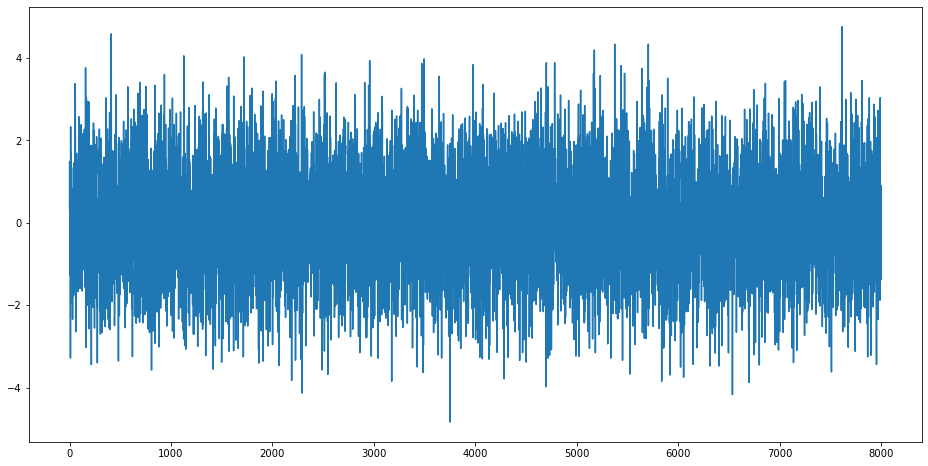

In [64]:
N = 8000
sigma = np.sqrt(1.2)
f0 = 0.1

phi = np.random.rand(N)
w = sigma*np.random.randn(N)
X = np.cos(2*np.pi*(f0*np.arange(N)+phi)) + w

pl.figure(figsize=[16,8])
pl.plot(X)
pl.show()

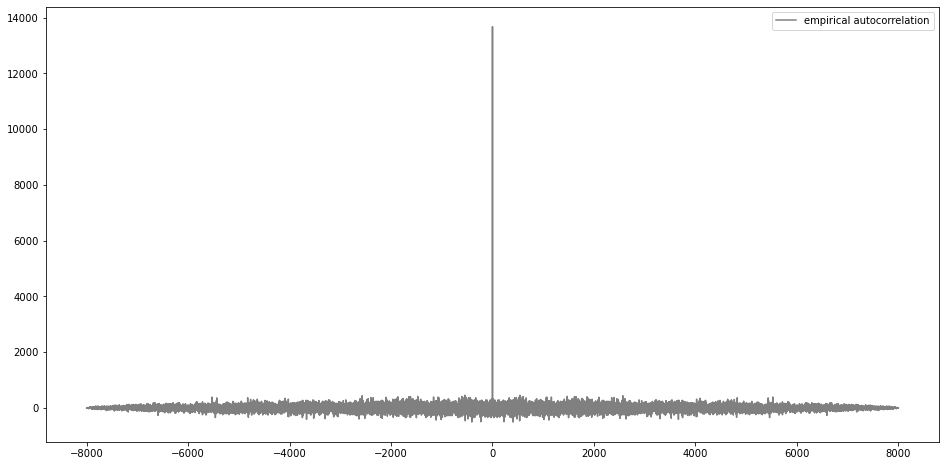

In [67]:
eac = np.correlate(X,X,mode='full')
t = np.arange(-N+1,N)

pl.figure(figsize=[16,8])
pl.plot(t,eac,c='grey',label='empirical autocorrelation')
#pl.xlim([])
pl.legend()
pl.show()

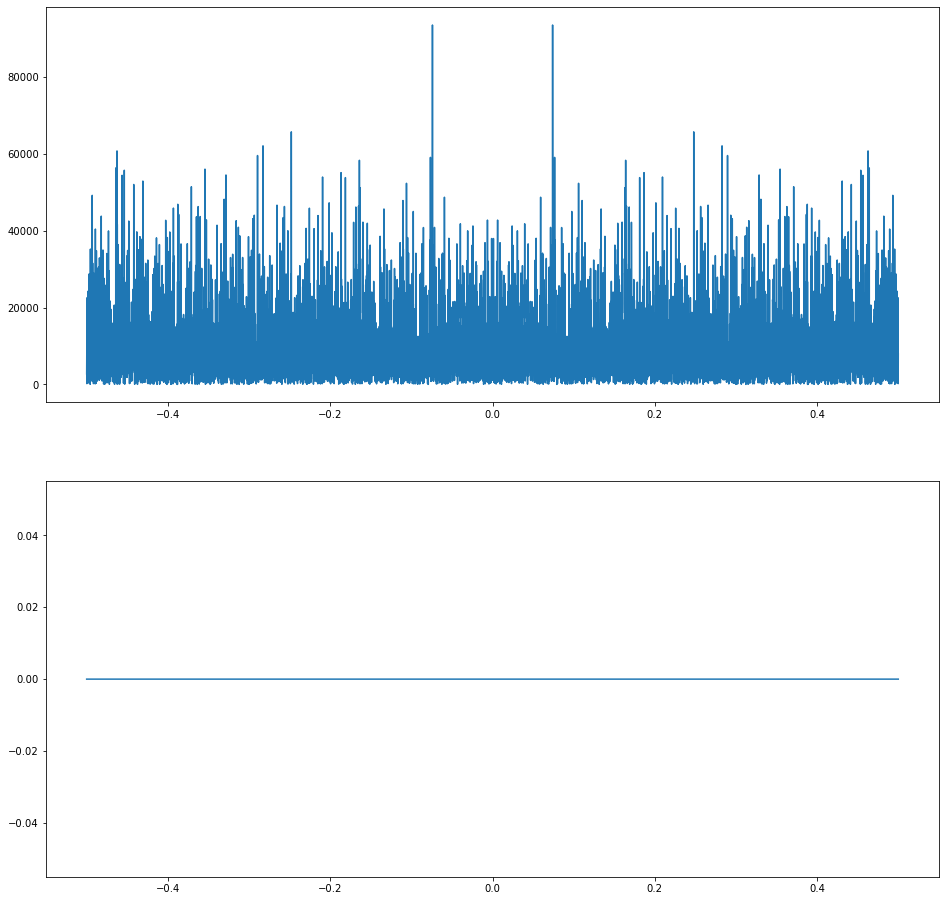

In [10]:
psd2 = np.power(np.abs(np.fft.fftshift(np.fft.fft(w))), 2)
f = np.fft.fftshift(np.fft.fftfreq(N))

pl.figure(figsize=[16,16])
pl.subplot(2,1,1)
pl.plot(f,np.real(psd2))

pl.subplot(2,1,2)
pl.plot(f,np.imag(psd2))

As expected we have two diracs at frequencies $-f_0$ and $f_0$, but they aren't very high compared to the noise.

In [11]:
N = 8000*3
sigma = np.sqrt(1.2)
f0 = 0.1

phi = np.random.rand(N)
w = sigma*np.random.randn(N)
X = np.cos(2*np.pi*(f0*np.arange(N)+phi)) + w


sp.io.wavfile.write('cosine.wav', 8000, X/np.max(X))

We can slightly hear that the pitch is higher, but it is quite subtle

## 2 - AR Modeling

### 2.1 - Simulated signals

In [154]:
N = 4096
sigma = np.sqrt(1.2)
w = sigma*np.random.randn(N)

X1 = sp.signal.lfilter([1], [1,-0.9], w)
X2 = sp.signal.lfilter([1], [1,-0.9,0.8], w)

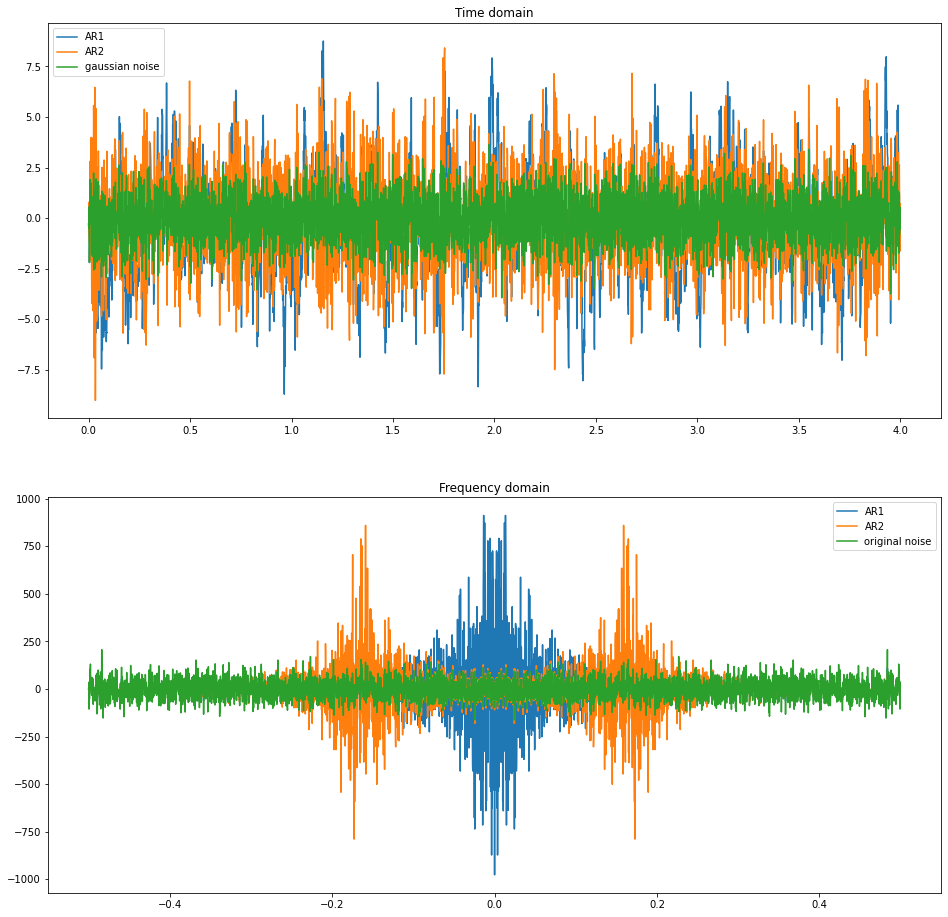

In [156]:
t = np.linspace(0.,4.,4096)

Y1 = np.fft.fftshift(np.fft.fft(X1))
Y2 = np.fft.fftshift(np.fft.fft(X2))
Y3 = np.fft.fftshift(np.fft.fft(w))
f = np.fft.fftshift(np.fft.fftfreq(N))


pl.figure(figsize=[16,16])
pl.subplot(2,1,1)
pl.title('Time domain')
pl.plot(t,X1,label='AR1')
pl.plot(t,X2, label='AR2')
pl.plot(t,w, label='gaussian noise')
pl.legend()
pl.subplot(2,1,2)
pl.title('Frequency domain')
pl.plot(f,np.real(Y1), label='AR1')
pl.plot(f,np.real(Y2), label='AR2')
pl.plot(f,np.real(Y3), label='original noise')
pl.legend()

AR1 is a low-pass filter, AR2 is a high-pass filter.

In [6]:
Ns = 8000
sigma = np.sqrt(1.2)
w = sigma*np.random.randn(Ns)

X1 = sp.signal.lfilter([1], [1,-0.9], w)
X2 = sp.signal.lfilter([1], [1,-0.9,0.8], w)

sp.io.wavfile.write('X1.wav', 8000, X1/np.max(X1))
sp.io.wavfile.write('X2.wav', 8000, X2/np.max(X2))

In [157]:
def ar_yule(x,N) :
    
    Ns = len(x)

    r = np.correlate(x,x,mode='full')
    c = np.flip(r[Ns-N:Ns])
    rx = r[Ns:Ns+N]
    
    ae = sp.linalg.solve_toeplitz(c, -rx)
    
    return np.concatenate(([1], ae))

In [158]:
Ns = 8000
sigma = np.sqrt(1.2)
w = sigma*np.random.randn(Ns)

X1 = sp.signal.lfilter([1], [1,-0.9], w)
X2 = sp.signal.lfilter([1], [1,-0.9,0.8], w)

print(ar_yule(X1,1))
print(ar_yule(X2,2))

[ 1.         -0.90516908]
[ 1.         -0.90828953  0.80616493]


A bigger number of samples result in a better precision of the coefficients returned. When the order $N$ given in parameter is larger than the actual order of the AR, the excess coeficients have values close to 0 compared to the others. However when the parameter $N$ is too small, the program tries to approximate the AR with a smaller order, so the coefficients are not necessarily close to what they would have been had the AR been computed with the proper order.

In [12]:
def get_psd_ar(a,f,sigma):
    Ns = len(f)
    aux = np.zeros(Ns,dtype=complex)
    psd = np.ones(Ns)*sigma*sigma
    N = len(a)
    
    for k in range(N) :
        aux += a[k]*np.exp(-2j*np.pi*f*k)
    
    return psd / (aux*np.conjugate(aux))

[52794.77083834] [47671.13060793]
[36162.48998009 18181.50098036] [ 18181.50098036 -12449.58407872]


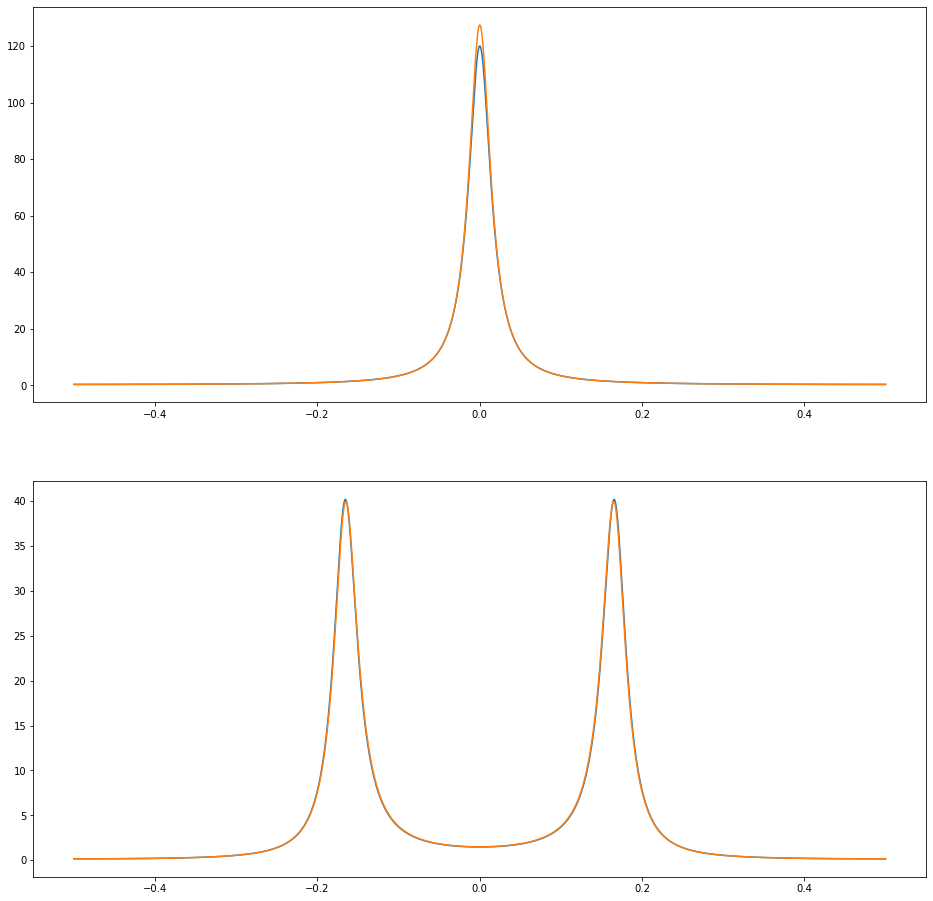

In [13]:
f = np.fft.fftshift(np.fft.fftfreq(Ns))

a1t = [1,-0.9]
a1p = ar_yule(X1,1)
a2t = [1,-0.9, 0.8]
a2p = ar_yule(X2,2)

psd1t = get_psd_ar(a1t,f,sigma)
psd1p = get_psd_ar(a1p,f,sigma)
psd2t = get_psd_ar(a2t,f,sigma)
psd2p = get_psd_ar(a2p,f,sigma)

pl.figure(figsize=[16,16])
pl.subplot(2,1,1)
pl.plot(f,np.real(psd1t))
pl.plot(f,np.real(psd1p))
pl.subplot(2,1,2)
pl.plot(f,np.real(psd2t))
pl.plot(f,np.real(psd2p))

The larger $N_s$, the more accurate the experimental graph is compared to the theoretical one. This is coherent with what we observed earlier.

In [53]:
X1 = sp.signal.lfilter([1], [1,-0.9], w)
X2 = sp.signal.lfilter([1], [1,-0.9,0.8], w)

X1bis = sp.signal.lfilter([1], ar_yule(X1,1), w)
X2bis = sp.signal.lfilter([1], ar_yule(X2,2), w)



sp.io.wavfile.write('X1bis.wav', 8000, X1bis/np.max(X1bis))
sp.io.wavfile.write('X2bis.wav', 8000, X2bis/np.max(X2bis))

It is quite hard to hear the difference between theoretical and experimental signal for each model, but we can clearly hear that the second model has the most high frequencies, the experimental signal seems to have more low frequencies though.

### 2.2 - AR modeling of real life signals

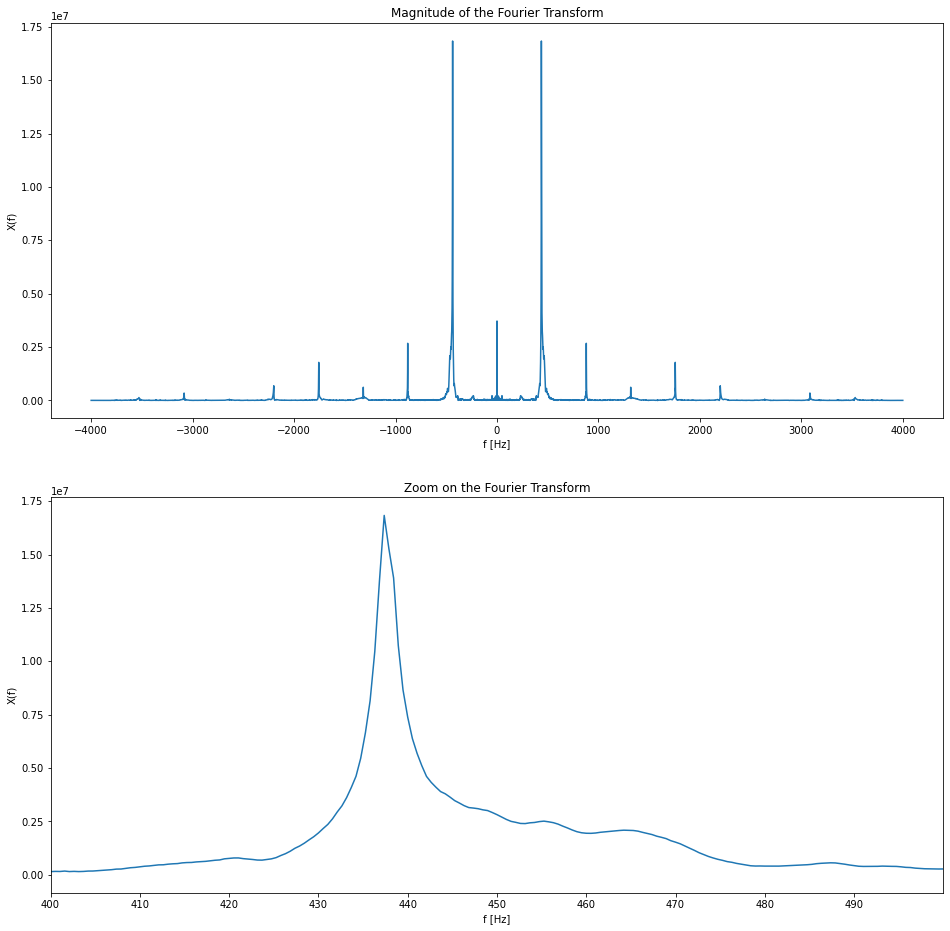

In [126]:
(fs, x) = sp.io.wavfile.read("uku.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


pl.figure(figsize=[16, 16])

pl.subplot(2,1,1)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.subplot(2,1,2)
pl.title('Zoom on the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.xlim([400,500])
pl.xticks(np.arange(400, 500, 10))
pl.show()

In [127]:
f0 = 438/fs
print(f0)

0.05475


The fundamental frequency of the note played is $438Hz$, or $0.05475$ in normalized frequency.

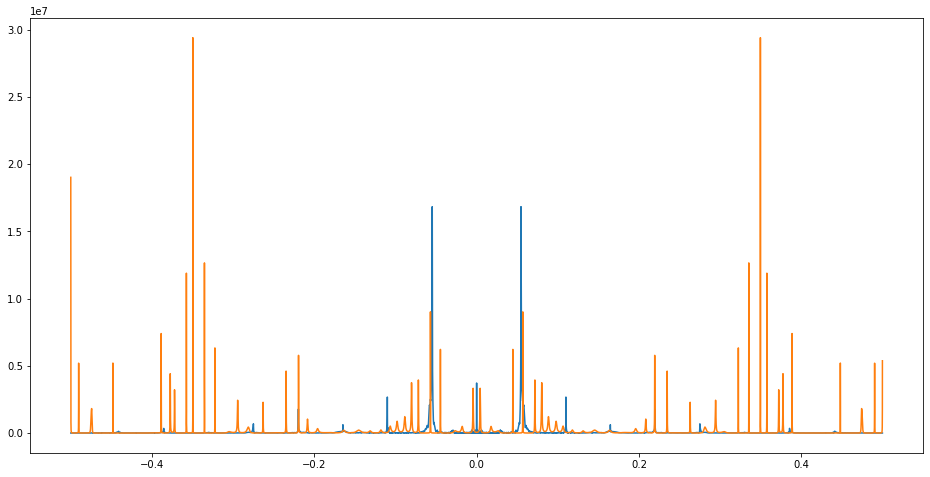

In [128]:
Ns = len(x)
N = 100

ar = ar_yule(x,N)
f = np.fft.fftshift(np.fft.fftfreq(Ns))

r = np.correlate(x,x,mode='full')
rx = r[Ns:Ns+N]

sigma = np.sqrt(r[Ns-1] + np.dot(ar[1:],rx))

psd = get_psd_ar(ar,f,sigma)


pl.figure(figsize=[16,8])
pl.plot(f,np.abs(y))
pl.plot(f,np.abs(psd))


This doesn't look much like the spectrum of the signal, we indeed have two spikes at the fundamental frequencies, but the part of the PSD high in frequency doesn't correspond.

In [133]:
fs = 8000
w = sigma*np.random.randn(3*fs)

X1 = sp.signal.lfilter([1], ar, w)

sp.io.wavfile.write('aaaaaaa.wav', fs, X1/np.max(X1))

24000


In [145]:
comb = np.zeros(fs)
mid = fs/2
i = 0.05475*fs
while(i < fs/2) :
    comb[int(mid + i)] = 1
    comb[int(mid - i)] = 1
    i += 0.05475*fs

comb *= 3*sigma

w2 = np.fft.fftshift(np.fft.fft(comb))

X2 = sp.signal.lfilter([1], ar, w2)
print(len(X2))

sp.io.wavfile.write('bbbbbb.wav', fs, np.real(X2)/np.max(np.real(X2)))

8000


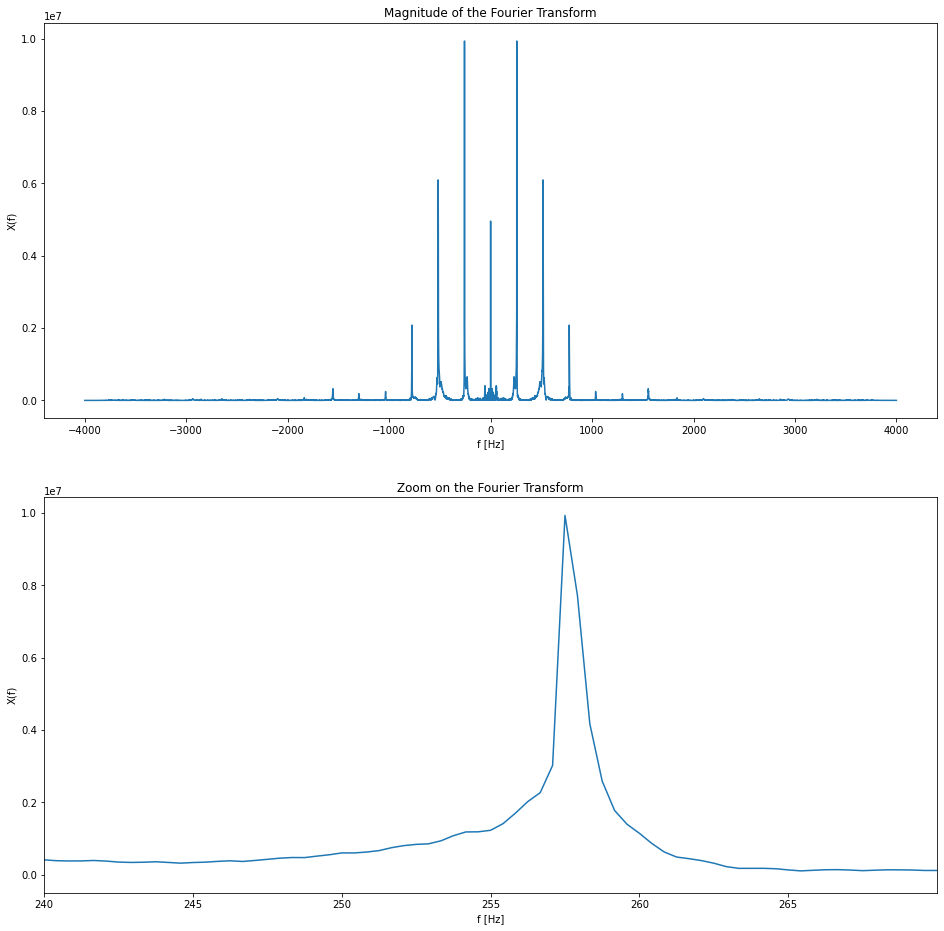

In [118]:
(fs, x) = sp.io.wavfile.read("uku2.wav")

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


pl.figure(figsize=[16, 16])

pl.subplot(2,1,1)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.subplot(2,1,2)
pl.title('Zoom on the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.xlim([240,270])
pl.xticks(np.arange(240, 270, 5))
pl.show()

In [85]:
f0 = 258/fs
print(f0)

0.03225


The fundamental frequency of the note played is $258𝐻𝑧$, or $0.03225$ in normalized frequency.

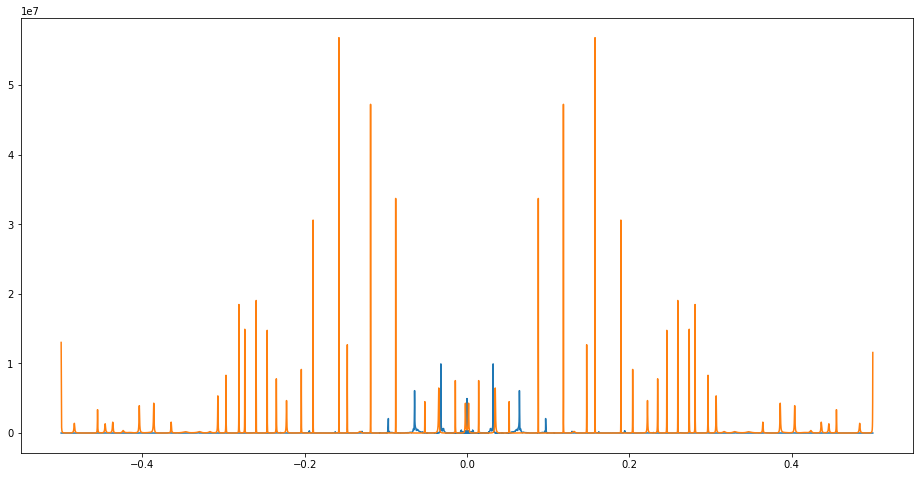

In [124]:
Ns = len(x)
N = 100

ar = ar_yule(x,N)
f = np.fft.fftshift(np.fft.fftfreq(Ns))

r = np.correlate(x,x,mode='full')
rx = r[Ns:Ns+N+1]

#sigma = np.sqrt(rx[0] + np.dot(ar[1:],rx[1:]))
sigma = 1000

psd = get_psd_ar(ar,f,sigma)


pl.figure(figsize=[16,8])
pl.plot(f,np.abs(y))
pl.plot(f,np.abs(psd))



## 3 - Wiener filtering

### 3.1 - Simulated signal

In [70]:
Ns = 1024
sigma = np.sqrt(1.2)
f0 = 0.1

phi = np.random.rand()
w = sigma*np.random.randn(Ns)


y = np.cos(2*np.pi*(f0*np.arange(Ns) + phi))
x = y + w

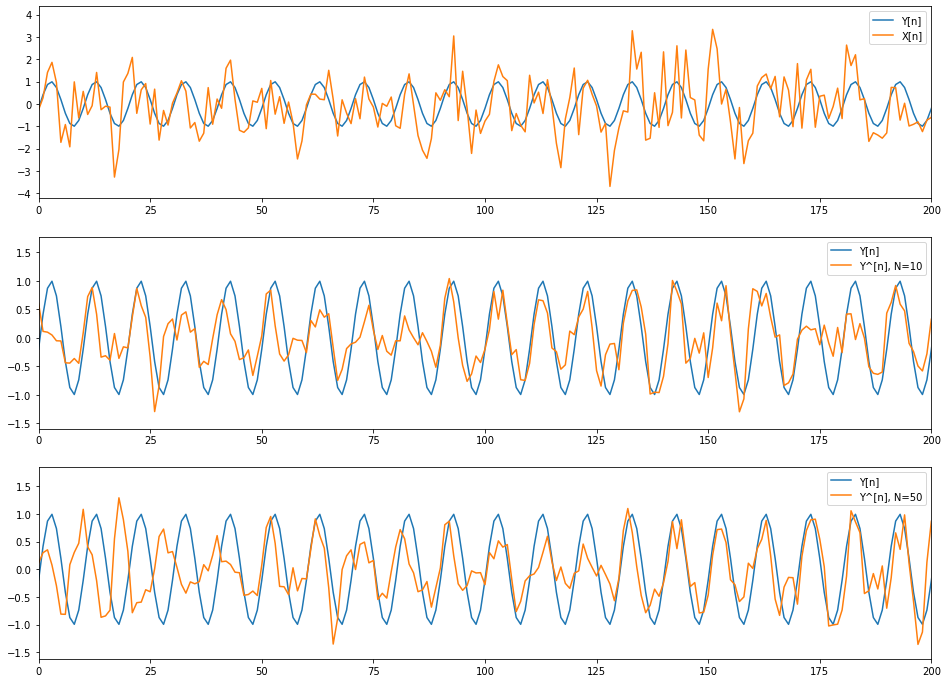

In [71]:
k = np.arange(Ns)
tac = 1/2*np.cos(2*np.pi*f0 * k) + (k==0)*sigma**2
tcc = 1/2*np.cos(2*np.pi*f0 * k)

N = 10

c10 = [tac[i] for i in np.arange(0,-N-1,-1)]
l10 = [tac[i] for i in np.arange(0,N+1)]
h10 = sp.linalg.solve_toeplitz((c10,l10), tcc[0:N+1])
y_pred10=[]
for n in range(Ns):
    y_pred10.append(sum(h10[k]*x[n-k] for k in range(N)))
    
N = 50

c50 = [tac[i] for i in np.arange(0,-N-1,-1)]
l50 = [tac[i] for i in np.arange(0,N+1)]
h50 = sp.linalg.solve_toeplitz((c50,l50), tcc[0:N+1])
y_pred50=[]
for n in range(Ns):
    y_pred50.append(sum(h50[k]*x[n-k] for k in range(N)))

    
pl.figure(figsize=[16, 12])
pl.plt.subplot(3,1,1)
pl.plot(k, y, label="Y[n]")
pl.plot(k, x, label="X[n]")
pl.xlim([0,200])
pl.legend()

pl.plt.subplot(3,1,2)
pl.plot(k, y, label="Y[n]")
pl.plot(k, y_pred10, label="Y^[n], N=10")
pl.xlim([0,200])
pl.legend()

pl.plt.subplot(3,1,3)
pl.plot(k, y, label="Y[n]")
pl.plot(k, y_pred50, label="Y^[n], N=50")
pl.xlim([0,200])
pl.legend()




The signal obtained via Wiener filtering looks closer to the original signal, but the signal obtained at order 50 seems of worse quality than the one obtained at order 10, which seems counter-intuitive. The beginning of the predicted signal at $N=50$ seems out of phase.

In [72]:
noise=np.sum(w*w)/Ns
signal = np.sum(y*y)/Ns
SNR = 10*np.log10(signal/noise)
print("Initial SNR :", SNR)

noise = np.sum(np.power(y-y_pred10, 2))/Ns
SNR = 10*np.log10(signal/noise)
print("SNR for N=10 :",SNR)

noise = np.sum(np.power(y-y_pred50, 2))/Ns
SNR = 10*np.log10(signal/noise)
print("SNR for N=50 :", SNR)

Initial SNR : -3.9685273407111414
SNR for N=10 : 3.2155041205193364
SNR for N=50 : 2.798714266860591


As expected, the SNR increases for $N=10$, but more than for $N=50$.

Text(0, 0.5, 'SNR')

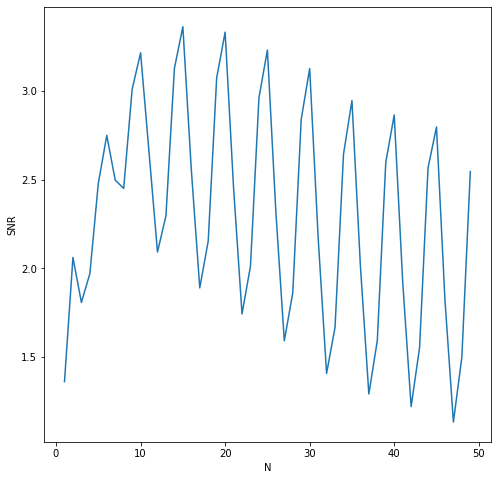

In [73]:
SNRs=[]

absc = np.arange(1,50)

for N in absc:
    c=[autocorr_th[i] for i in np.arange(0,-N-1,-1)]
    l=[autocorr_th[i] for i in np.arange(0,N+1)]

    #Toeplitz solving of the Wiener-Hopf equations:
    h=sp.linalg.solve_toeplitz((c,l), crosscorr_th[0:N+1])

    y_pred=[]
    for n in range(Ns):
        y_pred.append(sum(h[k]*x[n-k] for k in range(N)))
        
        
    noise = np.sum(np.power(y-y_pred, 2))/Ns
    signal = np.sum(y*y)/Ns
    SNR = 10*np.log10(signal/noise)
    SNRs.append(SNR)
    
pl.figure(figsize=[8, 8])
pl.plot(absc, SNRs)
plt.xlabel('N')
plt.ylabel('SNR')

The best SNR is obtained for $N=15$. We can notice a lot of oscillations in the graph obtained : the SNR varies strongly with $N$.

### 3.2 - Filtering Noise in real-life signals

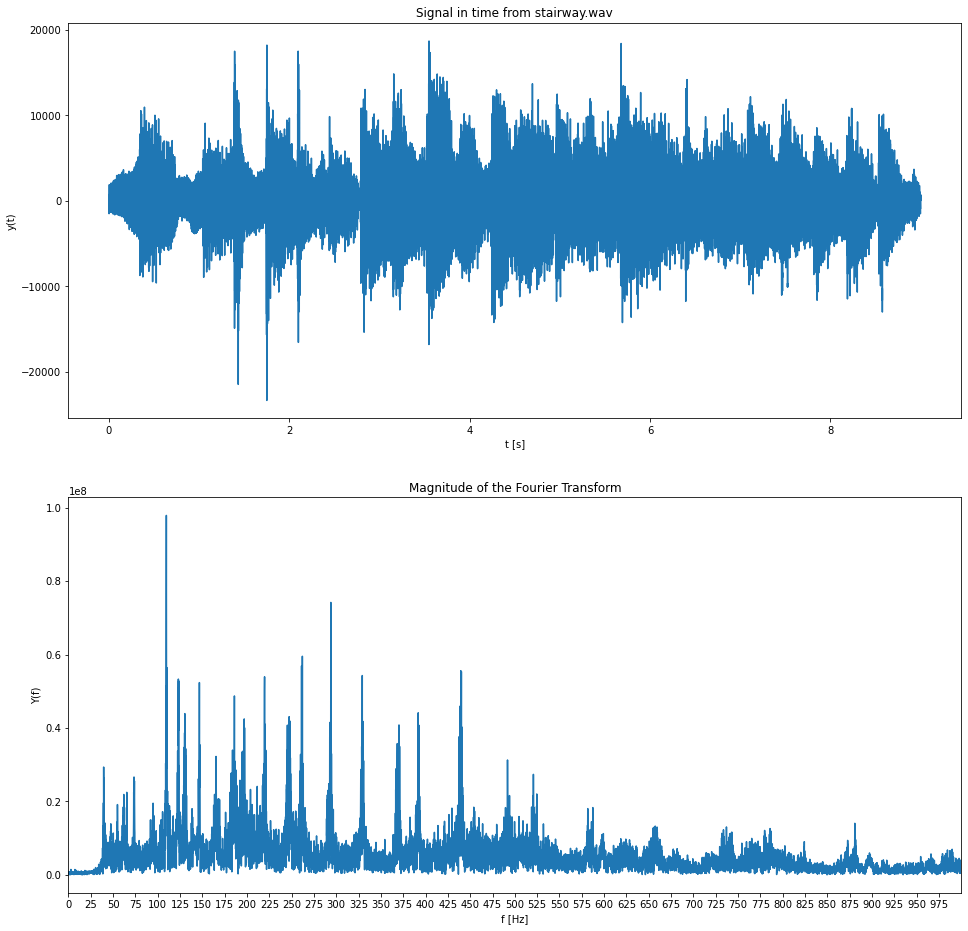

In [118]:
(fs, y) = scipy.io.wavfile.read("stairway.wav")

N = len(y)
T = N/fs

t = np.arange(0,T,1/fs)

Fy = np.fft.fftshift(np.fft.fft(y))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs


pl.figure(figsize=[16, 16])
pl.subplot(2,1,1)
pl.title('Signal in time from stairway.wav')
pl.plot(t, y)
pl.xlabel('t [s]')
pl.ylabel('y(t)')
pl.subplot(2,1,2)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(Fy))
pl.xlabel('f [Hz]')
pl.ylabel('Y(f)')
pl.xlim([0,1000])
pl.xticks(np.arange(0, 1000, 25))
pl.show()

In [119]:
sigma = np.std(y)
w = sigma*np.random.randn(N)

x = y + w
scipy.io.wavfile.write("stairwayb2.wav", fs, x/np.max(x))

In [148]:
Ns = len(y)
ks = np.arange(Ns)

RX = sp.signal.correlate(x,x,mode='full')
RXY = sp.signal.correlate(y,y,mode='full') 


N=10

c = [RX[i] for i in np.arange(0,-N-1,-1)]
l = [RX[i] for i in np.arange(0,N+1)]

h = sp.linalg.solve_toeplitz((c,l), RXY[0:N+1])

In [149]:
y_pred=[]
for n in range(Ns):
    y_pred.append(sum(h[k]*x[n-k] for k in range(N)))


sp.io.wavfile.write("stairway_wiener.wav", fs, y_pred/np.max(y_pred))

There is still noise but it is a bit dimmed and seems pitched higher.

In [150]:
noise = np.var(w)
signal = np.var(y)
SNR = 10*np.log10(signal/noise)
print("Initial SNR :", SNR)

noise = np.var(y-y_pred)
signal = np.var(y_pred)
SNR = 10*np.log10(signal/noise)
print("SNR for N=10 :",SNR)

Initial SNR : -0.010413264141671003
SNR for N=10 : -42.6273214187394


For $N=10$, the SNR decreases.

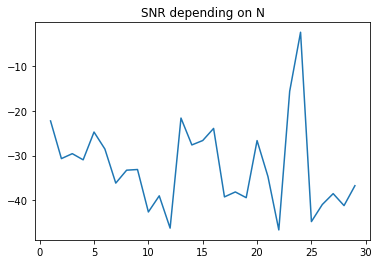

In [151]:
SNRs=[]

absc= np.arange(1,30)

for N in absc:
    c=[RX[i] for i in np.arange(0,-N-1,-1)]
    l=[RX[i] for i in np.arange(0,N+1)]

    h=sp.linalg.solve_toeplitz((c,l), RXY[0:N+1])

    y_pred=[]
    for n in range(Ns):
        y_pred.append(sum(h[k]*x[n-k] for k in range(N)))
     
    SNR = 10*np.log10(np.var(y_pred)/np.var(y_pred-y))
    SNRs.append(SNR)
    
plt.plot(absc, SNRs)
plt.title("SNR depending on N")
plt.show()

The optimum is at $N=24$.

In [143]:
fs, y_proxy = sp.io.wavfile.read("stairwayb.wav")

Ns=len(y)
ks=np.arange(Ns)

RX=sp.signal.correlate(x,x,mode='full')
RXY=sp.signal.correlate(x,y_proxy,mode='full')

N=23

c=[RX[i] for i in np.arange(0,-N-1,-1)]
l=[RX[i] for i in np.arange(0,N+1)]

h=sp.linalg.solve_toeplitz((c,l), RXY[0:N+1])

y_pred=[]
for n in range(Ns):
    y_pred.append(sum(h[k]*x[n-k] for k in range(N)))


sp.io.wavfile.write(filename="stairwaybwiener.wav", data=y_pred/np.max(y_pred), rate=fs)

print("The SNR of the filtered proxy is :", 10*np.log10(np.var(y_pred)/np.var(y_pred-y)))


The SNR of the filtered proxy is : -0.001086864337400105


The reconstruction is quite equivalent on the proxy and the original signal in terms of SNR.

In [147]:
Ns=len(y)
Sw=sigma**2
Sy=np.abs(np.fft.fft(y))**2

h=np.fft.ifft(Sy/(Sy+Sw))
h=np.real(h)
y_pred=[]
for n in range(Ns):
    y_pred.append(sum(h[k]*x[n-k] for k in range(N)))

sp.io.wavfile.write(filename="stairwayfft.wav", data=y_pred/np.max(y_pred), rate=fs)

print("The SNR of the filtered signal using the FFT is:", 10*np.log10(np.var(y_pred)/np.var(y_pred-y)))

The SNR of the filtered signal using the FFT is: 3.1384763681067533


In [146]:
Sw=sigma**2
Sy=np.abs(np.fft.fft(y_proxy))**2

h=np.fft.ifft(Sy/(Sy+Sw)) 
h=np.real(h)

y_pred=[]
for n in range(Ns):
    y_pred.append(sum(h[k]*x[n-k] for k in range(N)))

sp.io.wavfile.write(filename="stairwaybfft.wav", data=y_pred/np.max(y_pred), rate=fs)

print("The SNR of the filtered proxy using the FFT is:", 10*np.log10(np.var(y_pred)/np.var(y_pred-y)))


The SNR of the filtered proxy using the FFT is: 3.003303587356625


### Discussion

I had many difficulties on the implementations, often due to little mistakes but that are hard to spot. Another diffculty is that I didn't know what to expect concerning graphs and results, so it was sometimes hard to understand and interpretate since I wasn't even sure of what I was supposed to have